In [1]:
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform
from api_keys import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)


# Output File (CSV)
output_data_file = "output_data/cities.csv"



## Generate Cities List

In [3]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()


index      661
City       661
Country    661
dtype: int64

## Perform API Calls

In [4]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1


Beginning Data Retrieval


C:\Users\Alain\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Alain\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Alain\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Alain\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Alain\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Alain\Anaconda3\lib\s

------------------------
Proceesing: City #  1  |  Murgab TM
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=murgab
------------------------
Proceesing: City #  2  |  Tabuk PH
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=tabuk
------------------------
Proceesing: City #  3  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=hermanus
------------------------
Proceesing: City #  4  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=rikitea
------------------------
Proceesing: City #  5  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=cape+town
------------------------
Proceesing: City #  6  |  Kirakira SB
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245

------------------------
Proceesing: City #  48  |  Albany US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=albany
------------------------
Proceesing: City #  49  |  Vaini IN
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=vaini
------------------------
Proceesing: City #  50  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  51  |  Vahan AZ
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=vahan
------------------------
Proceesing: City #  52  |  Kahului US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=kahului
------------------------
Proceesing: City #  53  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f

------------------------
Proceesing: City #  95  |  San Policarpo PH
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=san+policarpo
------------------------
Proceesing: City #  96  |  Bathsheba BB
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=bathsheba
------------------------
Proceesing: City #  97  |  Puerto Cabezas NI
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=puerto+cabezas
City not found, skipping...
------------------------
Proceesing: City #  98  |  Barrow AR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=barrow
------------------------
Proceesing: City #  99  |  Chicama PE
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=chicama
------------------------
Proceesing: City #  100  |  Hilo US
http://api.op

------------------------
Proceesing: City #  142  |  Sao Jose da Coroa Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=sao+jose+da+coroa+grande
------------------------
Proceesing: City #  143  |  Samarai PG
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=samarai
------------------------
Proceesing: City #  144  |  Lagoa PT
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=lagoa
------------------------
Proceesing: City #  145  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=sao+filipe
------------------------
Proceesing: City #  146  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  147  |  Kokubu JP
http://api.openweathermap.or

------------------------
Proceesing: City #  188  |  Caravelas BR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=caravelas
------------------------
Proceesing: City #  189  |  Aksarka RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=aksarka
City not found, skipping...
------------------------
Proceesing: City #  190  |  Lavrentiya RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=lavrentiya
------------------------
Proceesing: City #  191  |  Touros BR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=touros
------------------------
Proceesing: City #  192  |  Sint-Genesius-Rode BE
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=sint-genesius-rode
------------------------
Proceesing: City #  193  |  Jutai BR
http:

------------------------
Proceesing: City #  234  |  Bani PH
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=bani
------------------------
Proceesing: City #  235  |  Egvekinot RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=egvekinot
------------------------
Proceesing: City #  236  |  Doha QA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=doha
------------------------
Proceesing: City #  237  |  Fuxin CN
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=fuxin
------------------------
Proceesing: City #  238  |  Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=mahebourg
------------------------
Proceesing: City #  239  |  Berlevag NO
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb080

------------------------
Proceesing: City #  281  |  Alushta UA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=alushta
------------------------
Proceesing: City #  282  |  Mushie CD
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=mushie
------------------------
Proceesing: City #  283  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=bandarbeyla
------------------------
Proceesing: City #  284  |  Shar NG
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=shar
------------------------
Proceesing: City #  285  |  Myingyan MM
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=myingyan
------------------------
Proceesing: City #  286  |  Grand Bend CA
http://api.openweathermap.org/data/2.5/weather?appid=290

------------------------
Proceesing: City #  326  |  Inuvik CA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=inuvik
------------------------
Proceesing: City #  327  |  Cherusti RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=cherusti
------------------------
Proceesing: City #  328  |  Talnakh RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=talnakh
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  329  |  Lata IN
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=lata
------------------------
Proceesing: City #  330  |  Ossora RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=ossora
------------------------
Proceesing: City #  331  |  Zhangye CN
http://api.op

------------------------
Proceesing: City #  372  |  Ukiah US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=ukiah
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  373  |  Baherden TM
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=baherden
------------------------
Proceesing: City #  374  |  Margate AU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=margate
------------------------
Proceesing: City #  375  |  Gamba CN
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=gamba
------------------------
Proceesing: City #  376  |  Los Llanos de Aridane ES
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=los+llanos+de+aridane
------------------------
Proceesing: City #  37

------------------------
Proceesing: City #  419  |  Ostersund SE
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=ostersund
------------------------
Proceesing: City #  420  |  Makakilo City US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=makakilo+city
------------------------
Proceesing: City #  421  |  Mnogovershinnyy RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=mnogovershinnyy
------------------------
Proceesing: City #  422  |  Roswell US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=roswell
------------------------
Proceesing: City #  423  |  Swan Hill AU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=swan+hill
------------------------
Proceesing: City #  424  |  Dickinson US
http://api.openweatherm

------------------------
Proceesing: City #  464  |  San Juan PR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=san+juan
------------------------
Proceesing: City #  465  |  Ekhabi RU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=ekhabi
------------------------
Proceesing: City #  466  |  Pangnirtung CA
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=pangnirtung
------------------------
Proceesing: City #  467  |  Quimper FR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=quimper
------------------------
Proceesing: City #  468  |  Arroyo US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=arroyo
City not found, skipping...
City not found, skipping...
City not found, skipping...
------------------------
Proceesing

------------------------
Proceesing: City #  509  |  Owase JP
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=owase
------------------------
Proceesing: City #  510  |  Lizzano IT
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=lizzano
------------------------
Proceesing: City #  511  |  Rach Gia VN
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=rach+gia
------------------------
Proceesing: City #  512  |  Capoterra IT
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=capoterra
------------------------
Proceesing: City #  513  |  Basco US
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=basco
------------------------
Proceesing: City #  514  |  Nizhnevartovsk RU
http://api.openweathermap.org/data/2.5/weather?appid=290

------------------------
Proceesing: City #  555  |  Guerrero Negro MX
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=guerrero+negro
------------------------
Proceesing: City #  556  |  Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=isangel
------------------------
Proceesing: City #  557  |  La Virtud AR
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=la+virtud
------------------------
Proceesing: City #  558  |  Sekoma BW
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=sekoma
------------------------
Proceesing: City #  559  |  Port Pirie AU
http://api.openweathermap.org/data/2.5/weather?appid=29095fddebfb0804245d24f80ba7771f&units=IMPERIAL&q=port+pirie
City not found, skipping...
------------------------
Proceesing: City #  560  |  Ola RU
http://api.open

In [5]:
clean_cities_df.count()

City                582
Country             582
Temperature (F)     582
Latitude            582
Longitude           582
Humidity (%)        582
Cloudiness (%)      582
Wind Speed (mph)    582
dtype: int64

In [6]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)


,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Murgab,TM,77,37.5,61.97,36,0,4.61
1,Tabuk,PH,78.31,17.41,121.44,85,56,1.74
2,Hermanus,ZA,37.27,-34.42,19.24,75,0,3.49
3,Rikitea,PF,74.89,-23.12,-134.97,100,44,7.52
4,Cape Town,ZA,46.4,-33.93,18.42,75,0,4.7
5,Kirakira,SB,81.37,-10.46,161.92,100,88,17.63
6,Tarko-Sale,RU,63.1,64.92,77.78,65,24,8.41
7,Vestmannaeyjar,IS,47.26,63.44,-20.27,100,48,8.86
8,Sur,OM,86.95,22.57,59.53,88,8,11.59
9,Ushuaia,AR,33.8,-54.81,-68.31,86,20,8.05


In [7]:
# Save data to a CSV file
clean_cities_df.to_csv("output_data/cities.csv")


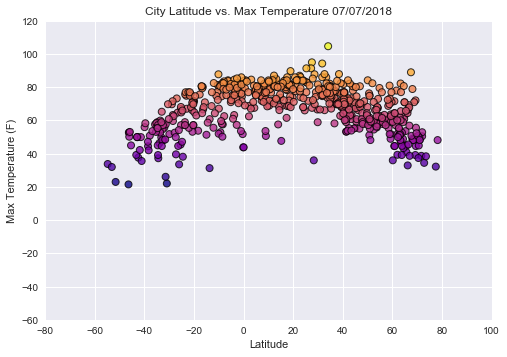

In [9]:
# Latitude vs Temperature
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Weather_analysis/Latitude_Temperature.png")

# Show plot
plt.show()


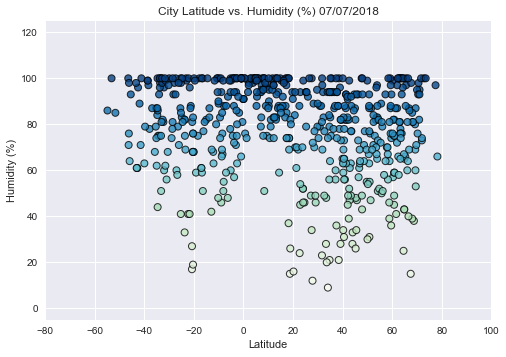

In [10]:
# Latitude vs. Humidity(%)
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Weather_analysis/Latitude_Humidity.png")

# Show plot
plt.show()


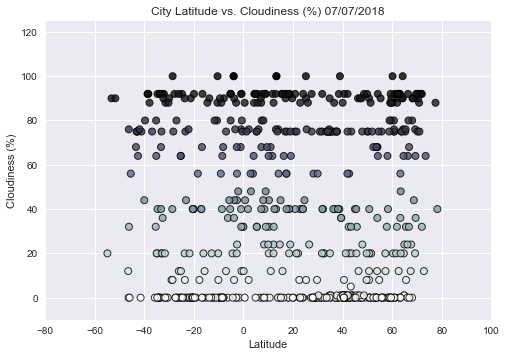

In [11]:
# Latitude vs.Cloudiness(%)
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Weather_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()


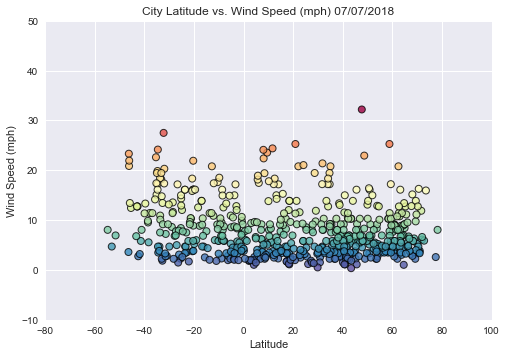

In [13]:
# Latitude vs. Wind Speed (mph)
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Weather_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()


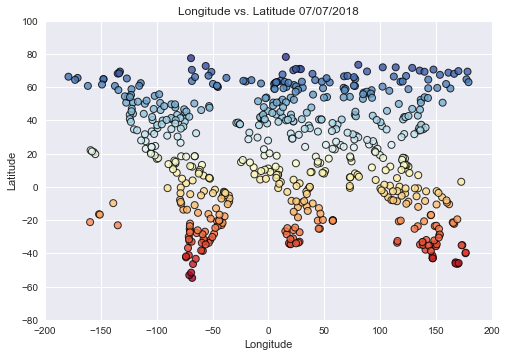

In [14]:
#Latitude vs. Longitude
#Build a scatter plot for Latitude vs. Longitude

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("Weather_analysis/Latitude_Longitude.png")

# Show plot
plt.show()


In [ ]:
#Observable trend #1
#As you can see from the plot latitude vs. Temperature cities that are closer to the equator (0 degree latitude) have high temperatures and cities that are further away from the equator have low temperatures during their winter season.

#Observable trend # 2
# There is no relationship between the cloudiness of the cities selected and latitude.

#Observable trend #3
# There is no relationship between the humidity of the cities selected and latitude.